In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

In [2]:
TrainDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDx.csv')
TrainDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDy.csv')
ValDx = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDx.csv')
ValDy = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDy.csv')

In [3]:
TotalTrainDx = pd.concat([TrainDx, ValDx], axis=0) 
TotalTrainDy = pd.concat([TrainDy, ValDy], axis=0)

In [4]:
def RFchecker(n_estimators, max_features, max_depth, min_samples_leaf):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf, verbose=True, n_jobs=-1)
    rf.fit(TrainDx, TrainDy)
    predVal = pd.DataFrame(rf.predict(ValDx), columns=['danger'])
    return metrics.accuracy_score(ValDy, predVal)

In [10]:
n_estimators = [20, 50, 100]
max_features = [0.1, 0.4, 0.7]
max_depth = [2, 6, 9]
min_samples_leaf = [10, 50, 100]

In [12]:
maxi = 0
bestP = []
i = 0
for ne in n_estimators:
    for mf in max_features:
        for md in max_depth:
            for msl in min_samples_leaf:
                print(i)
                i+=1
                curr = RFchecker(ne, mf, md, msl)
                print(curr)
                print([ne, mf, md, msl])
                if (maxi<curr):
                    maxi = curr
                    bestP = [ne, mf, md, msl]
print(maxi)
print(bestP)

0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.9993844997298377
[100, 0.1, 9, 10]
1


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.9996335189231095
[100, 0.4, 9, 10]
2


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


0.9996100265463856
[100, 0.7, 9, 10]
0.9996335189231095
[100, 0.4, 9, 10]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [13]:
maxi

0.9996335189231095

In [14]:
bestP

[100, 0.4, 9, 10]

In [18]:
best_model = RandomForestClassifier(n_estimators=100, max_features=0.4, max_depth=9, min_samples_leaf=10, verbose=True, n_jobs=-1)
best_model.fit(TrainDx, TrainDy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


RandomForestClassifier(max_depth=9, max_features=0.4, min_samples_leaf=10,
                       n_jobs=-1, verbose=True)

## Accuracies

In [19]:
def accFinder(X, y):
    return metrics.accuracy_score(best_model.predict(X), y)

In [20]:
acc_card = []

In [21]:
acc_card.append(accFinder(TrainDx, TrainDy))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [22]:
acc_card.append(accFinder(ValDx, ValDy))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [23]:
TestDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDx.csv')
TestDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDy.csv')
acc_card.append(accFinder(TestDx, TestDy))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


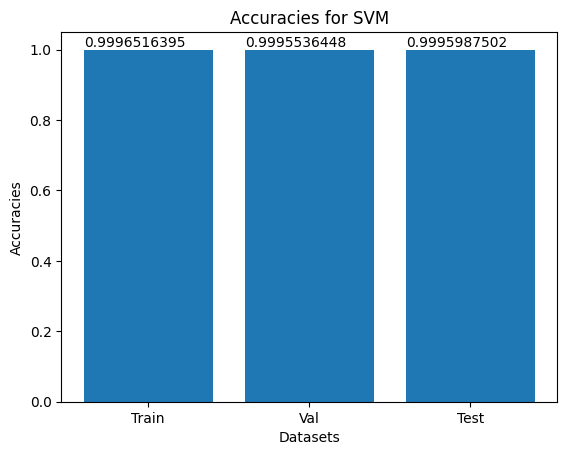

In [24]:
# Create a list of indices for the x-axis
indices = range(len(acc_card))
# Create the bar graph
bars = plt.bar(indices, acc_card)
# Optionally, you can set the labels for the x-axis to be something other than the indices
labels = ['Train', 'Val', 'Test']
plt.xticks(indices, labels)
# Labeling the axes
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
# Giving a title to the graph
plt.title('Accuracies for SVM')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, '{:.10f}'.format(yval), va='bottom') # va: vertical alignment
plt.show()

## Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [27]:
TestPreds = best_model.predict(TestDx)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [28]:
cm = pd.DataFrame(confusion_matrix(TestPreds, TestDy, labels=[0,1]))
cm

,0,1
0,153864,77
1,45,150064


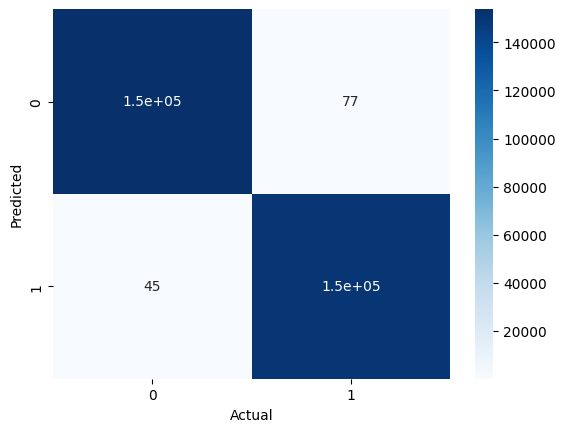

In [29]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [30]:
def recall(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[i][type]
    return true/total

def precision(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[type][i]
    return true/total

def specificity(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = 0
    for i in range(len(labels)):
        if(i==type):
            continue;
        true += confMat[i][i]
    total = 0
    for j in range(len(labels)):
        if(j==type):
            continue
        for i in range(len(labels)):
            total += confMat[i][j]
    return true/total

In [31]:
labels=[0,1]

In [32]:
for i in range(len(labels)):
    print('recall of class '+str(i)+': '+str(recall(i, TestPreds, TestDy, [0,1])))

recall of class 0: 0.9997076194374598
recall of class 1: 0.9994871487468446


In [33]:
for i in range(len(labels)):
    print('precision of class '+str(i)+': '+str(precision(i, TestPreds, TestDy, [0,1])))

precision of class 0: 0.999499808368141
precision of class 1: 0.9997002178417017


In [34]:
for i in range(len(labels)):
    print('specificity of class '+str(i)+': '+str(specificity(i, TestPreds, TestDy, [0,1])))

specificity of class 0: 0.9994871487468446
specificity of class 1: 0.9997076194374598


## Saving the model

In [35]:
import pickle
with open('RFDanger.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [36]:
import joblib
dt = {
    'RFDager':best_model,
}
joblib.dump(dt, 'RFDanger.joblib')

['RFDanger.joblib']